In [11]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import seaborn as sns
import tqdm
from matplotlib import pyplot as plt

%matplotlib inline

sns.set(style='whitegrid')
import matplotlib
matplotlib.rcParams["figure.dpi"] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

import numpy as np
from sklearn.linear_model import LinearRegression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
audio_aucs = [0.7783, 0.7786, 0.7815, 0.7672, 0.7745, 0.7848]
image_aucs = [ 0.7848, 0.7791,0.7725, 0.781]
text_aucs = [ 0.7745, 0.7798, 0.7855, 0.769, 0.7652, 0.7673, 0.7731]

audio_params = [29e6, 153e6, 456e6, 12e6, 30e6, 111e6]
image_params = [85e6, 302e6, 85e6, 302e6]
text_params =  [124e6, 355e6, 774e6, 110e6, 335e6, 60e6, 223e6]


In [73]:
aucs = np.round(np.array(audio_aucs + image_aucs + text_aucs), 3)
params = np.array(audio_params + image_params + text_params).reshape(-1, 1)

In [74]:
lm = LinearRegression(n_jobs=-1)

In [75]:
lm.fit(np.log(params), aucs)

LinearRegression(n_jobs=-1)

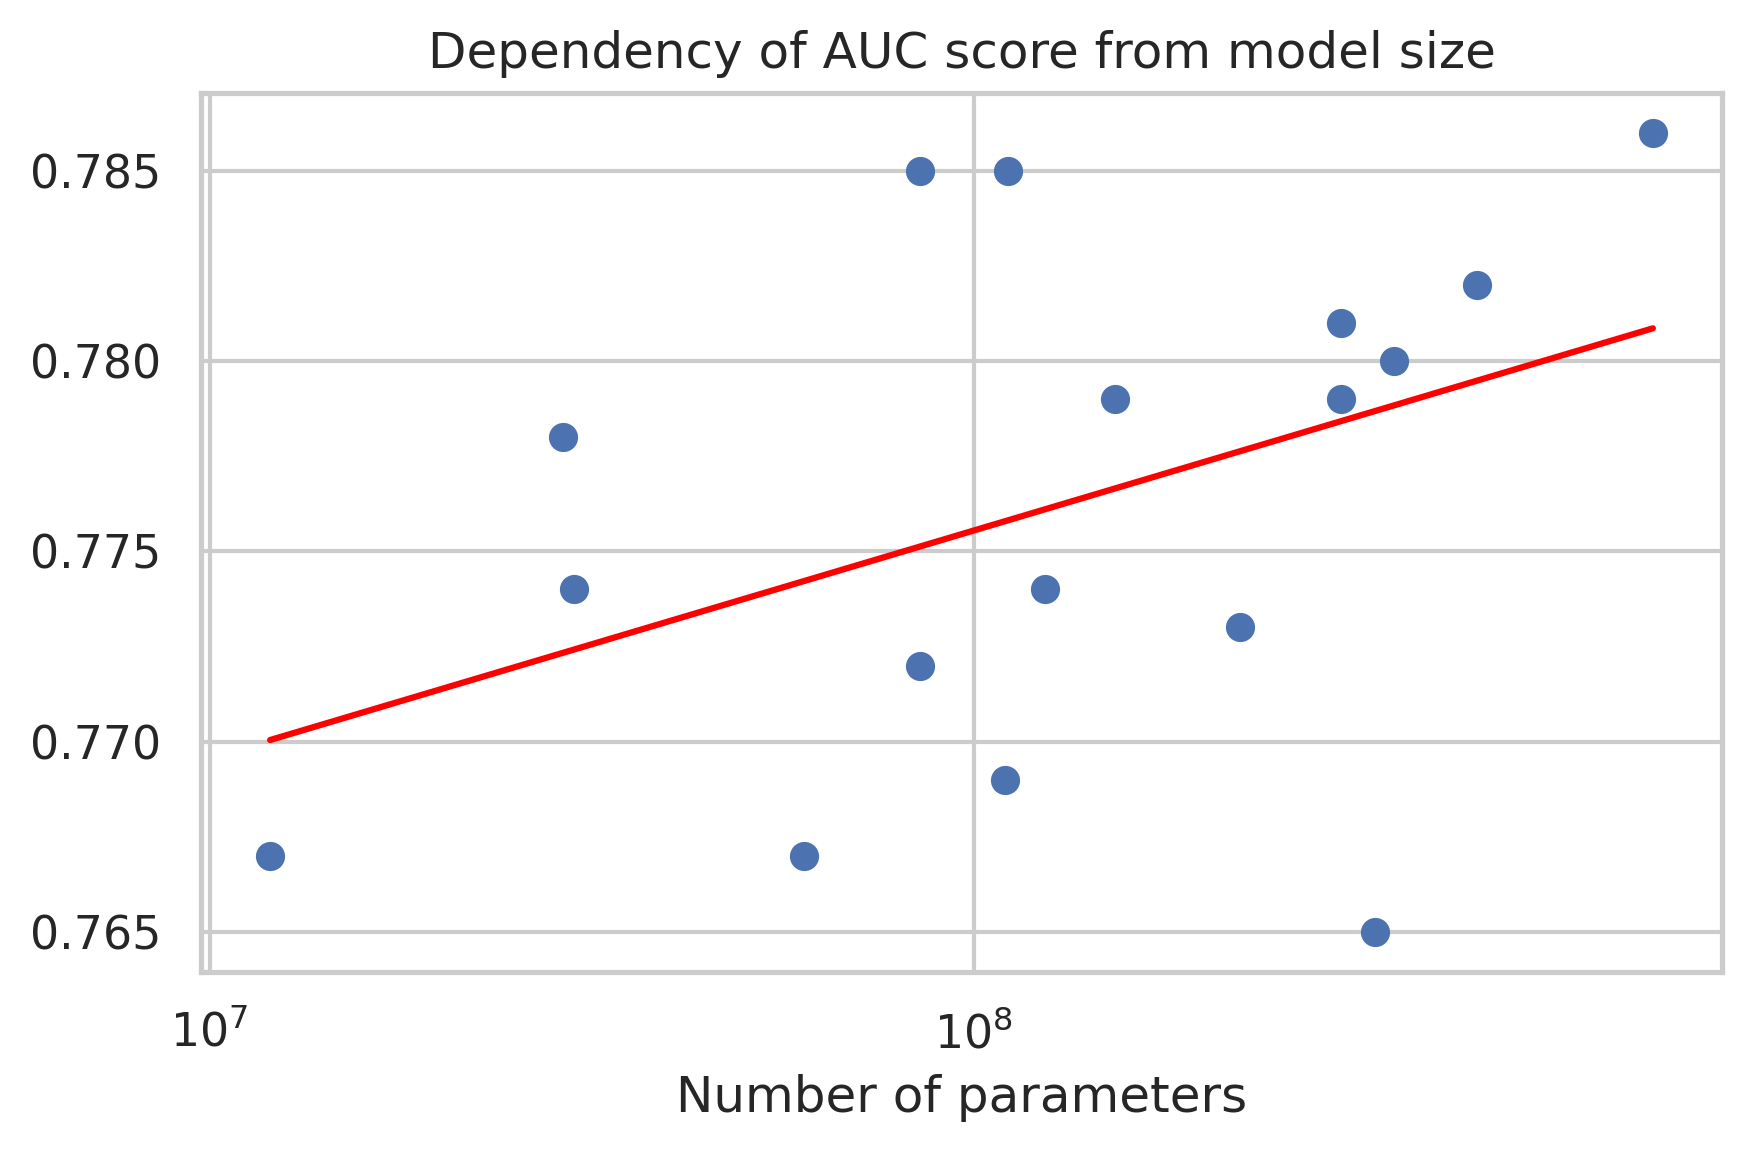

In [80]:
plt.scatter(params, aucs)
plt.plot(sorted(params), lm.predict(sorted(np.log(params))), color='red')
plt.xlabel("Number of parameters")
plt.title("Dependency of AUC score from model size")
plt.semilogx()
plt.tight_layout()
plt.savefig("auc_score_parame.png")
plt.show()